# This is our notebook

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.model import MLP
from src.Optimizers import HBG, CG
from src.GridSearch import GridSearch

In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

### Grid Search

For each architecture, we find the set of parameters with best training objective.

HBG

In [11]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'

params_grid = {
    'alpha' : [0.01, 0.05, 0.1],
    'beta' : [0.7, 0.8, 0.9],
}

Shallow architecture

In [ ]:
model = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Deep architecture

In [ ]:
model = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Linear NN (convex optimization)

In [ ]:
model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = HBG(loss, regularization, stopping_criterion)

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

CG

We perform a different grid search for each beta type

Shallow architecture

Deep architecture

### Experiments

obj_tol


ValueError: EarlyStopping object must be provided at initialization for stopping criterion 'obj_tol' or 'grad_norm'

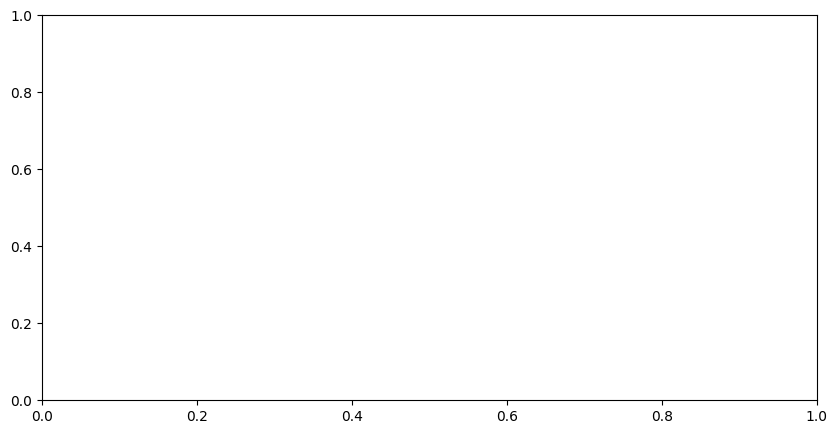

In [3]:
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = False


mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')


optimizer = HBG(loss = loss, regularization_function = regularization, stopping_criterion = stopping_criterion)

for mlp in [mlp_shallow, mlp_deep, mlp_linear]:
    fig, ax = plt.subplots(1,1, figsize = (10,5))

    for i in range(5):
        mlp.initialize()
        optimizer.initialize(mlp, alpha = 0.01, beta = 0.5, stopping_value = 1e-3, alpha_l2 = 0.001, verbose = verbose)
        optimizer.fit_model(X_train, y_train)
        ax.plot(optimizer.obj_history, label = 'HBG objective function')
        print(np.min(optimizer.obj_history))

1.8642782842762575
11.306314652055063
1.883956874948494
1.9102704059434696
1.8949135222910156
1.849966132692842
1.8557391005909196
1.8555953678279897
1.8913859736767793
1.8665282920238937
1.900886011879059
1.8735922356332735
1.8809831345337291
1.8519417831272968
1.896158865784143
30.07242098263235
30.074019162229845
30.071771660891326
30.075293705063423
30.07052006457085
1.9608276838033167
2.0327205873028387
2.0006880301149517
2.0055712384243067
2.0544998731368036
2.1203653170940284
1.9920696218848195
2.1077125460364243
1.997408587199221


KeyboardInterrupt: 

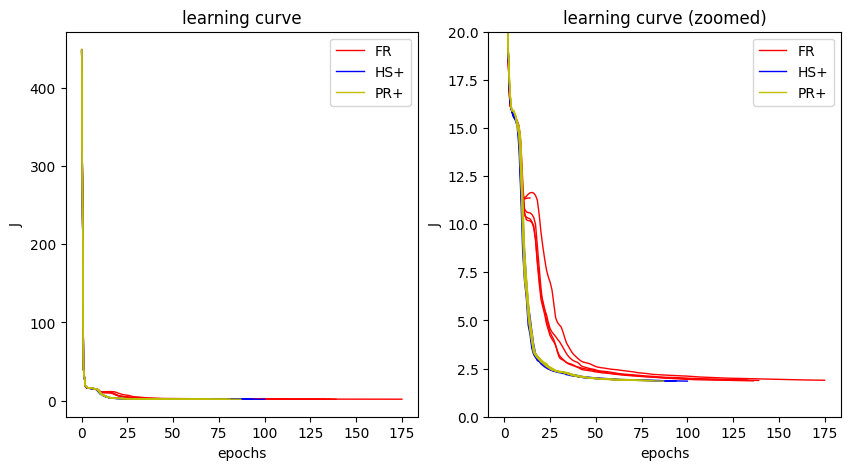

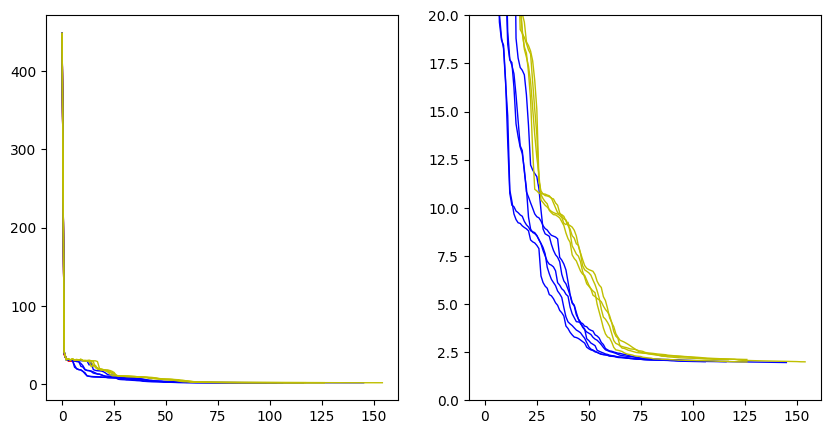

In [13]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'obj_tol'
verbose = False

mlp_shallow = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_deep = MLP([20, 40, 20], 9, 2, task = "regression", activation_function = 'sigm')
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

optimizer = CG(loss, regularization, stopping_criterion)
beta_color = {'FR' : 'r', 'HS+' : 'b', 'PR+' : 'y'}

for mlp in [mlp_shallow, mlp_deep, mlp_linear]:
    
    fig, ax = plt.subplots(1,2, figsize = (10,5))

    for beta in ['FR', 'HS+', 'PR+']: 

        for i in range(5):

            mlp.initialize()
            optimizer.initialize(mlp, beta_type = beta, stopping_value = 1e-3, alpha_l2 = alpha_l2, verbose = verbose)
            optimizer.fit_model(X_train, y_train)
            line, = ax[0].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            line_zoom, = ax[1].plot(optimizer.obj_history, beta_color[beta], linewidth = 1)
            if i == 1:
                line.set_label(beta)
                line_zoom.set_label(beta)
            ax[1].set_ylim(0,20)
            print(np.min(optimizer.obj_history))

    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("J")
    ax[0].set_title("learning curve")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("J")
    ax[1].set_title("learning curve (zoomed)")